# <center> Machine Learning for customer segmentation through clustering</center>

# Goals:
In this project, we will develop and apply different clustering tecnhiques. Unsupervised methodologies are broadly used in business to generate **insights** from several type of data sources as text or image and they are a baseline tool for multiple areas marketing, sales or customer care. 

In our case, we will use clustering techniques to understand a customer base; i.e. describe the main characteristics of our customers for **marketing purposes**.

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction.
The project is structured as follows:

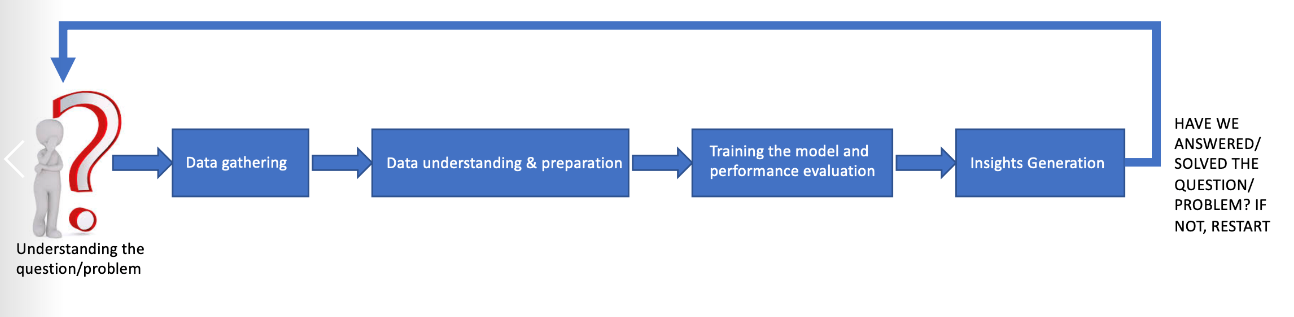


In this project, we will apply two clustering techniques: K-means and Mixture of Gaussians. Both techniques follow different approach to cluster or segment the data. We will learn how to apply them using Python and how they are used to generate insights about our customer base, i.e. identify the main types or **sterotypes** of customers and their differences. Besides, we will learn to calculate the optimal K value and measure the quality of the clustering.

*******

# Step 0. Understanding the problem: customers' stereotypes 

Recently, we have joined a data scientist and AI engineering team of a telco company. This team is supporting decision making process of several internal areas as marketing and customer care.

Our marketing colleagues are planning to launch a new commercial campaign for a new mobile tariff. As input for the tariff design, the Marketing product managers needs to know the **pattern** or **stereotypes** of our current customers: i.e. the main customers' sectors (Industry, Services, Agriculture, ...), number of employees, Turnover, which products they consume, how much they spend in telco services, etc. 

To support marketing demands, we are going **to use two of the most important clustering techniques: K-means and Mixture of Gaussians (MoG).**


# Step 1: Data gathering


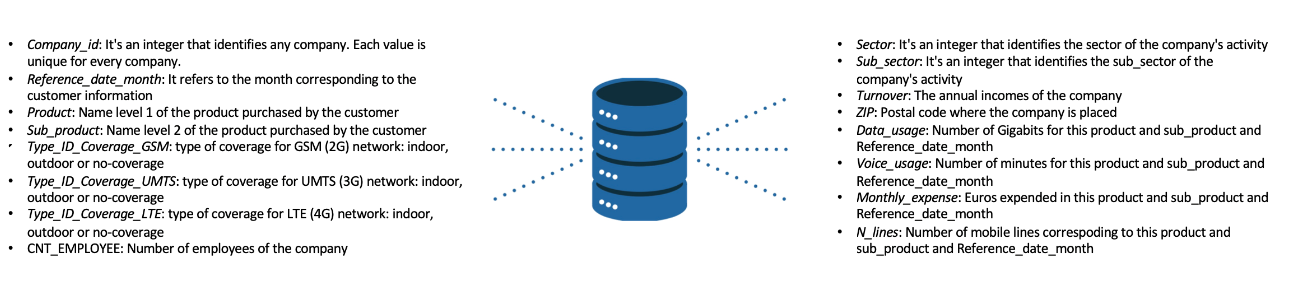


In this practice we are using a new dataset named `customer_dt.csv`. This file contains information of **272 of our telco's consumers** for 3 months. In particular, the detailed information for each customer is:

- *Company_id*: It's an integer that identifies any company. Each value is unique for every company.
- *Reference_date_month*: It refers to the month corresponding to the customer information
- *Product*: Name level 1 of the product
- *Sub_product*: Name level 2 of the product
- *Type_ID_Coverage_GSM*: type of coverage for GSM (2G) network: indoor, outdoor or no-coverage
- *Type_ID_Coverage_UMTS*: type of coverage for UMTS (3G) network: indoor, outdoor or no-coverage
- *Type_ID_Coverage_LTE*: type of coverage for LTE (4G) network: indoor, outdoor or no-coverage
- *CNT_EMPLOYEE: Number of employees of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *Sub_sector*: It's an integer that identifies the sub_sector of the company's activity
- *Turnover*: The annual incomes of the company
- *ZIP*: Postal code where the company is placed
- *Data_usage*: Number of Gigabits for this product and sub_product and Reference_date_month 
- *Voice_usage*: Number of minutes for this product and sub_product and Reference_date_month 
- *Monthly_expense*: Euros expended in this product and sub_product and Reference_date_month
- *N_lines*: Number of mobile lines this product and sub_product and Reference_date_month

# Step 2: Data understanding and preparation

Once we know the problem to solve, the next stage is to have a clear understanding of the data we have extracted and to prepare it before modelling. In particular, we will:
- List and verify the type of each variable (object, float, int...). Identify variables with nulls. Measure the memory usage
- Eliminate rows with nulls in order to have a dataset 100% fulfilled
- Aggregate rows with monthly expense per customers in order to have just 1 sample per customers
- Exploratory Data Analysis to understand main statistics (mean, standard deviation, min&max values and 25%-50%-75% quartiles) and distribution of the most relevant variables or features as data usage, voice usage, monthly expense and number of lines
- Plot several graphs in order to identify how variables are related between them. In particular:
- correlation matrix
- 2D and 3D scatter plots between data usage, voice usage and monthly expense

Once this part, also known as **data wrangling** of the Project is done, we should achieve a deep knowledge about the data. Besides, the dataset will have been processed to be ready to apply the clustering algorithms to solve the business problem.

Let's import the main Python libraries required in our project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits import mplot3d
from scipy.stats import chi2_contingency
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

#from google.colab import drive
#drive.mount('/content/drive')

Open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [3]:
customer_dt = pd.read_csv('/data/customer_dt.csv', sep=";" )
customer_dt.head()

,Company_id,Reference_date_month,Product,Sub_product,TYPE_ID_Coverage_GSM,TYPE_ID_Coverage_UMTS,TYPE_ID_Coverage_LTE,CNT_EMPLOYEE,Sector,Sub_sector,Turnover,Revenue_Scale,ZIP,Data_usage,Voice_usage,Monthly_expense,N_lines
0,27,2019-09-01 00:00:00,FB,FB S 2.0,indoor,indoor,indoor,1000.0,76,762,117560584.0,50.000.001 - 500.000.000,55218,0.197695,592.916666,40.895523,2
1,27,2019-10-01 00:00:00,FB,FB S 2.0,indoor,indoor,indoor,1000.0,76,762,117560584.0,50.000.001 - 500.000.000,55218,0.202878,414.500000,40.504723,2
2,27,2019-11-01 00:00:00,FB,FB S 2.0,indoor,indoor,indoor,1000.0,76,762,117560584.0,50.000.001 - 500.000.000,55218,0.025758,579.850000,40.880215,2
3,79,2019-09-01 00:00:00,FB,FB M 2.0,indoor,no_coverage,no_coverage,58.0,7,63,11000000.0,5.000.001 - 25.000.000,74706,1.789936,2633.950000,174.356365,7
4,79,2019-09-01 00:00:00,FB,FB S 2.0,indoor,no_coverage,no_coverage,58.0,7,63,11000000.0,5.000.001 - 25.000.000,74706,2.480318,3559.633332,365.362522,19


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which is the variable with more nulls? And with no nulls? 

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In our dataset there a subset of variables that describe a company regardless of the month, i.e. `Company_id`, `CNT_EMPLOYEE`, `Sector`, `Sub_sector`, `Turnover`, `Revenue_Scale` and `ZIP`. We should guarantee that our dataset for training the cluster has no **nulls** in those variables.  

In [5]:
print(customer_dt.info())
print("\n")

print(customer_dt["Turnover"].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             1175 non-null   int64  
 1   Reference_date_month   1175 non-null   object 
 2   Product                1175 non-null   object 
 3   Sub_product            1175 non-null   object 
 4   TYPE_ID_Coverage_GSM   1128 non-null   object 
 5   TYPE_ID_Coverage_UMTS  1128 non-null   object 
 6   TYPE_ID_Coverage_LTE   1128 non-null   object 
 7   CNT_EMPLOYEE           1124 non-null   float64
 8   Sector                 1175 non-null   int64  
 9   Sub_sector             1175 non-null   int64  
 10  Turnover               772 non-null    float64
 11  Revenue_Scale          772 non-null    object 
 12  ZIP                    1175 non-null   int64  
 13  Data_usage             1175 non-null   float64
 14  Voice_usage            1175 non-null   float64
 15  Mont

Mas: las de 1175 (o nulls) mens: Turnover and Revenue_scale with 403 nulls

[**EX2**] [**CODE**] Eliminate those rows with nulls in any of the descriptive company variables, i.e. `Company_id`, `CNT_EMPLOYEE`, `Sector`, `Sub_sector`, `Turnover`, `Revenue_Scale` and `ZIP`.

Tip: you may have to use the [set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) function.

Let's re-calculate the type of the variables (integer, float, chart...) and the size of the dataset and the file. Your output should look like this:

In [6]:
customer_dt=customer_dt.set_index("Reference_date_month")
customer_dt=customer_dt.dropna(axis=0,how="any", subset=["Company_id","CNT_EMPLOYEE", "Sector", "Sub_sector", "Turnover", "Revenue_Scale", "ZIP"])
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 2019-09-01 00:00:00 to 2019-11-01 00:00:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             771 non-null    int64  
 1   Product                771 non-null    object 
 2   Sub_product            771 non-null    object 
 3   TYPE_ID_Coverage_GSM   768 non-null    object 
 4   TYPE_ID_Coverage_UMTS  768 non-null    object 
 5   TYPE_ID_Coverage_LTE   768 non-null    object 
 6   CNT_EMPLOYEE           771 non-null    float64
 7   Sector                 771 non-null    int64  
 8   Sub_sector             771 non-null    int64  
 9   Turnover               771 non-null    float64
 10  Revenue_Scale          771 non-null    object 
 11  ZIP                    771 non-null    int64  
 12  Data_usage             771 non-null    float64
 13  Voice_usage            771 non-null    float64
 14  Monthly_expense        771 no

Now all this variables have 0 nulls, and the size of our dataframe is 771

As we observe, there are still few rows with **null** values in `TYPE_ID_Coverage_GSM`, `TYPE_ID_Coverage_UMTS` and `TYPE_ID_Coverage_LTE`. Let's understand which registers are.

[**EX3**] [**CODE**] Create a `non_coverage_register` variable with the rows with **nulls** in these coverage variables. How many registers does the new `non_coverage_register` variable have?

In [7]:
non_coverage_register=customer_dt[(customer_dt["TYPE_ID_Coverage_GSM"].isna()==True)|(customer_dt["TYPE_ID_Coverage_UMTS"].isna()==True)|(customer_dt["TYPE_ID_Coverage_LTE"].isna()==True)]

print(non_coverage_register["Company_id"])
non_coverage_register.info()

Reference_date_month
2019-09-01 00:00:00    10211
2019-10-01 00:00:00    10211
2019-11-01 00:00:00    10211
Name: Company_id, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2019-09-01 00:00:00 to 2019-11-01 00:00:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             3 non-null      int64  
 1   Product                3 non-null      object 
 2   Sub_product            3 non-null      object 
 3   TYPE_ID_Coverage_GSM   0 non-null      object 
 4   TYPE_ID_Coverage_UMTS  0 non-null      object 
 5   TYPE_ID_Coverage_LTE   0 non-null      object 
 6   CNT_EMPLOYEE           3 non-null      float64
 7   Sector                 3 non-null      int64  
 8   Sub_sector             3 non-null      int64  
 9   Turnover               3 non-null      float64
 10  Revenue_Scale          3 non-null      object 
 11  ZIP                    3 non-null      int64  
 

As **nulls** in coverage only affects one customer, we can decide to remove it from the training dataset or to impute an statistic value as the mean, median or most frequent value in each of these nulls.

[**EX4**] [**CODE**] Remove the customers with **nulls** in coverage variables.

Now, the resulting dataset should look like this:

In [8]:
customer_dt=customer_dt.dropna(axis=0,how="any", subset=["TYPE_ID_Coverage_GSM", "TYPE_ID_Coverage_UMTS", "TYPE_ID_Coverage_LTE"])
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 2019-09-01 00:00:00 to 2019-11-01 00:00:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_id             768 non-null    int64  
 1   Product                768 non-null    object 
 2   Sub_product            768 non-null    object 
 3   TYPE_ID_Coverage_GSM   768 non-null    object 
 4   TYPE_ID_Coverage_UMTS  768 non-null    object 
 5   TYPE_ID_Coverage_LTE   768 non-null    object 
 6   CNT_EMPLOYEE           768 non-null    float64
 7   Sector                 768 non-null    int64  
 8   Sub_sector             768 non-null    int64  
 9   Turnover               768 non-null    float64
 10  Revenue_Scale          768 non-null    object 
 11  ZIP                    768 non-null    int64  
 12  Data_usage             768 non-null    float64
 13  Voice_usage            768 non-null    float64
 14  Monthly_expense        768 no

As explained before, our original dataset includes **up to 3 months of telco consumption (voice, data and number of mobile lines) and expense** per customer.

[**EX5**] [**CODE**] Create a new dataset named `customer_dt_summary` with only one register per `Company_id` and `Sub_product` category with the average value in `Data_usage`, `Voice_usage` and `Monthly_expense` and `N_lines`. Which is the size of your new dataset? Verify this new dataset does not contain **nulls**.

In [9]:
customer_dt_summary=customer_dt[["Company_id","Sub_product","Data_usage","Voice_usage", "Monthly_expense", "N_lines"]]
customer_dt_summary=customer_dt_summary.groupby(["Company_id","Sub_product"]).mean()
print(customer_dt_summary)


                        Data_usage  Voice_usage  Monthly_expense  N_lines
Company_id Sub_product                                                   
27         FB S 2.0       0.142110   529.088889        40.760154      2.0
79         FB M 2.0       2.559694  2843.300000       186.736801      7.0
           FB S 2.0       3.301382  3320.655555       365.423259     19.0
95         FB L 2.0       9.922201     0.000000        28.000100      1.0
           FB M 2.0       9.958323  2762.566667       258.310459      8.0
...                            ...          ...              ...      ...
48768      FB S 2.0       0.228380   104.083333        32.379339      1.0
48822      FB S           3.144723   285.638889       122.481215     10.0
48925      FB S           7.902668  1807.583333       397.829135     13.0
49477      FB L 2.0       5.240662   269.494445        36.115795      1.0
49681      FB M 2.0       1.012475     0.033333        30.000364      1.0

[271 rows x 4 columns]


In [10]:
customer_dt_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 271 entries, (27, 'FB S 2.0') to (49681, 'FB M 2.0')
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data_usage       271 non-null    float64
 1   Voice_usage      271 non-null    float64
 2   Monthly_expense  271 non-null    float64
 3   N_lines          271 non-null    float64
dtypes: float64(4)
memory usage: 10.7+ KB


In Machine Learning, it is key to understand the nature of the data before training. For numeric variables, it is useful to calculate the distribution and main statistics.

[**EX6**] [**REPORT**] Calculate the main statistics (max, min, mean, median and standard deviation) of `Data_usage`, `Voice_usage`, `Monthly_expense` and `N_lines` variables. Plot a histogram for each of these variables

Tip: use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram. You also can use **dataframe_column.hist(bins=number_of_bins)**

Histogram of the summary data
Data usage min: 0.00, max: 2568.38, mean: 40.95, median: 3.02, sd: 196.46
Voice usage min: 0.00, max: 260638.69, mean: 3412.36, median: 369.48, sd: 17114.64
Monthly expense min: 0.00, max: 9091.51, mean: 271.70, median: 65.29, sd: 778.99
Number of lines min: 0.00, max: 973.00, mean: 17.73, median: 2.00, sd: 72.48

Histogram of the summary data without outliers
Data usage min: 0.00, max: 27.28, mean: 4.91, median: 1.66, sd: 6.70
Voice usage min: 0.00, max: 7657.23, mean: 777.29, median: 274.84, sd: 1254.31
Monthly expense min: 0.00, max: 1762.07, mean: 102.01, median: 53.78, sd: 151.22
Number of lines min: 0.00, max: 58.33, mean: 4.28, median: 2.00, sd: 6.90


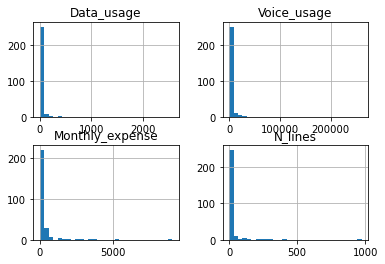

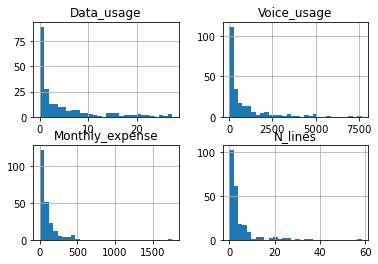

In [11]:
print("Histogram of the summary data")
customer_dt_summary[["Data_usage", "Voice_usage","Monthly_expense", "N_lines"]].hist(bins=30)
customer_no_outliers=customer_dt_summary[["Data_usage", "Voice_usage","Monthly_expense", "N_lines"]]

def main_stats(column):
  min=column.min()
  max=column.max()
  mean=column.mean()
  median=column.median()
  sd= column.std()
  return min, max, mean, median, sd

data_usage= main_stats(customer_dt_summary["Data_usage"])
voice_usage= main_stats(customer_dt_summary["Voice_usage"])
monthly_expense= main_stats(customer_dt_summary["Monthly_expense"])
n_lines= main_stats(customer_dt_summary["N_lines"])
print("Data usage min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(data_usage[0], data_usage[1], data_usage[2], data_usage[3], data_usage[4]))
print("Voice usage min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(voice_usage[0], voice_usage[1], voice_usage[2], voice_usage[3], voice_usage[4]))
print("Monthly expense min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(monthly_expense[0], monthly_expense[1], monthly_expense[2], monthly_expense[3], monthly_expense[4]))
print("Number of lines min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(n_lines[0], n_lines[1], n_lines[2], n_lines[3], n_lines[4]))


#Esto quitando los 15% max para ver mejor
print("\nHistogram of the summary data without outliers")
customer_no_outliers=customer_no_outliers[customer_no_outliers["Data_usage"].between(customer_no_outliers["Data_usage"].quantile(.0), customer_no_outliers["Data_usage"].quantile(.85))]
customer_no_outliers.hist(bins=30)

data_usage= main_stats(customer_no_outliers["Data_usage"])
voice_usage= main_stats(customer_no_outliers["Voice_usage"])
monthly_expense= main_stats(customer_no_outliers["Monthly_expense"])
n_lines= main_stats(customer_no_outliers["N_lines"])
print("Data usage min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(data_usage[0], data_usage[1], data_usage[2], data_usage[3], data_usage[4]))
print("Voice usage min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(voice_usage[0], voice_usage[1], voice_usage[2], voice_usage[3], voice_usage[4]))
print("Monthly expense min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(monthly_expense[0], monthly_expense[1], monthly_expense[2], monthly_expense[3], monthly_expense[4]))
print("Number of lines min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, sd: {:.2f}".format(n_lines[0], n_lines[1], n_lines[2], n_lines[3], n_lines[4]))


Additionaly to understanding each individual variable, it is important to understand how they are related to each other. 

[**EX7**] [**REPORT**] Calculate and plot the correlation matrix between traffic attributes (i.e. `Voice_usage` and `Data_usage`), `Monthly_expense`, `N_lines`, `Turnover` and `CNT_EMPLOYEE`. 
- Which are the variables with more and less correlation with respect to the `Monthly_expense` variable?
- Which are the top 2 variables with higher correlation with `Voice_usage`?
- Is `Data_usage` correlated with `Turnover`? Does it mean that a company spend more in `Data usage` when its `Turnover`increases? 
- Which is the highest correlated variable with `CNT_EMPLOYEE`?
- A company with high `Voice traffic` consumption but low `Data traffic`uses to spend more that other company with high `Data traffic`and low `Voice traffic`? Justify your answer.

Tip: use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

,Data_usage,Voice_usage,Monthly_expense,N_lines,Turnover,CNT_EMPLOYEE
Data_usage,1.000000,0.327104,0.355372,0.402734,0.126128,0.298305
Voice_usage,0.327104,1.000000,0.767026,0.940066,-0.034378,-0.032440
Monthly_expense,0.355372,0.767026,1.000000,0.810076,0.018335,0.001247
N_lines,0.402734,0.940066,0.810076,1.000000,-0.016893,-0.011199
Turnover,0.126128,-0.034378,0.018335,-0.016893,1.000000,0.663925
CNT_EMPLOYEE,0.298305,-0.032440,0.001247,-0.011199,0.663925,1.000000


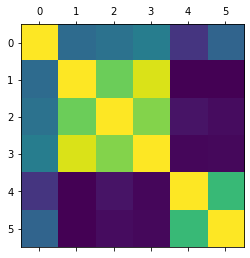

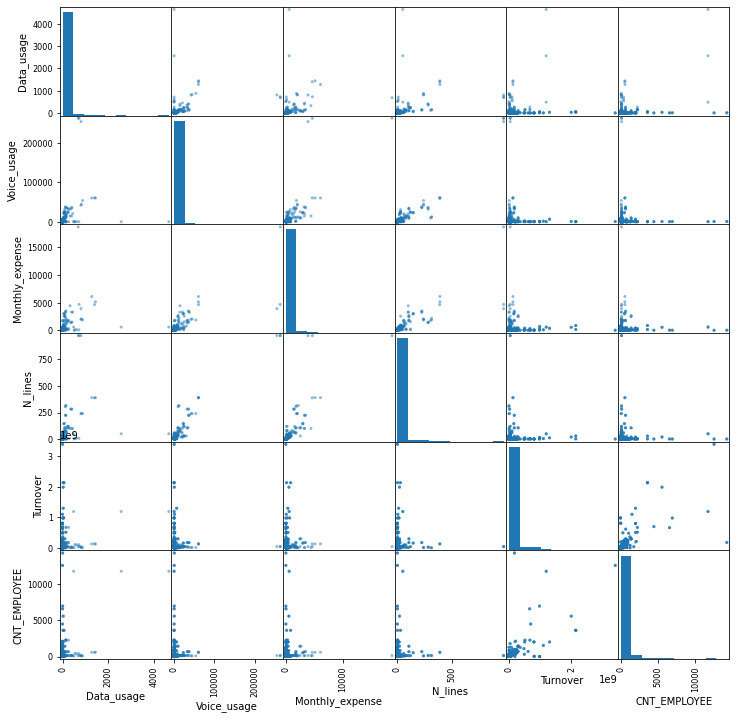

In [12]:
customer_corr = customer_dt[["Data_usage", "Voice_usage","Monthly_expense", "N_lines", "Turnover", "CNT_EMPLOYEE"]]
corr=customer_corr.corr()
plt.matshow(corr)
pd.plotting.scatter_matrix(customer_corr,figsize=(12,12))
display(corr)

Another option to analyze the relation 1-to-1 between 2 variables in through scatter plots. Let's simplify the original dataset and create a new `training_dt`dataset with only `Voice_usage`, `Data_usage` and `Monthly_expense`.

In [13]:
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
training_dt.head()

Voice_usage  Data_usage  Monthly_expense
Company_id Sub_product                                          
27         FB S 2.0      529.088889    0.142110        40.760154
79         FB M 2.0     2843.300000    2.559694       186.736801
           FB S 2.0     3320.655555    3.301382       365.423259
95         FB L 2.0        0.000000    9.922201        28.000100
           FB M 2.0     2762.566667    9.958323       258.310459

[**EX8**] [**REPORT**] Visualize a scatter plot with `Voice_usage` vs `Monthly_expense` variables. Could you visually identify any cluster? How many? Repeat the plot with registers which `Voice_usage`is between 0 and 10000 minutes. Could you identify any cluster?

<AxesSubplot:xlabel='Voice_usage', ylabel='Monthly_expense'>

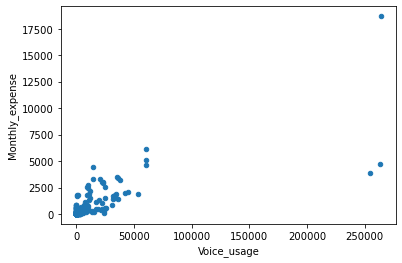

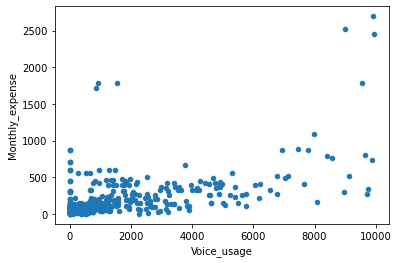

In [14]:
customer_dt.plot.scatter(x="Voice_usage", y="Monthly_expense")

fig = plt.figure()
ax = plt.subplot(111)

customer_dt_voice=customer_dt[customer_dt['Voice_usage']<=10000]
customer_dt_voice.plot(x='Voice_usage',y='Monthly_expense',ax=ax, kind='scatter')


[**EX9**] [**REPORT**] Visualize a scatter plot with `Data_usage` vs `Monthly_expense` variables. Could you visually identify any cluster? How many?Repeat the plot with registers which `Data_usage`is between 0 and 500 GB. Could you identify any cluster?

<AxesSubplot:xlabel='Data_usage', ylabel='Monthly_expense'>

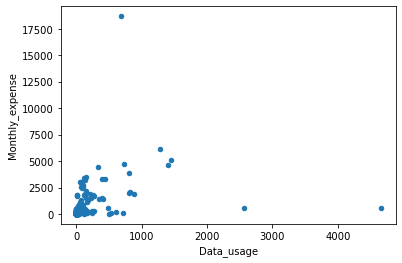

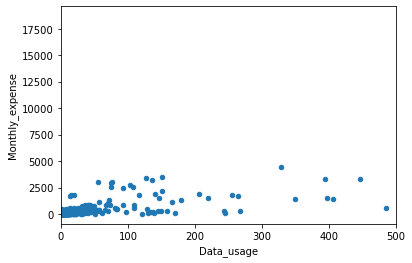

In [15]:
customer_dt.plot.scatter(x="Data_usage", y="Monthly_expense")


fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlim(0,500)
customer_dt.plot(x='Data_usage',y='Monthly_expense',ax=ax, kind='scatter')




[**EX10**] [**REPORT**] To improve our understanding of the data, plot a 3D visualization between `Voice_usage`, `Data_usage`and `Monthly_expense` for a new subset of the dataset where `Voice_usage`is below 10000 minutes and `Data_usage`is <=100 GB.
- Could you visually identify any cluster? How many?
- Could you identify any **outlier**?
- Could you identify a cluster bigger than the others? Describe approximately it in terms of the values of these 3 variables


Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

If we rotate the 3D scatter plot, the output looks like as follows:

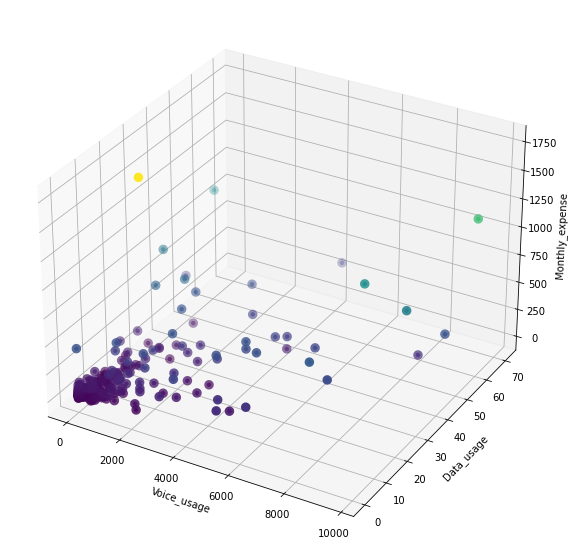

In [16]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
training_dt_filtered=training_dt[(training_dt['Voice_usage']<=10000) & (training_dt['Data_usage']<=100)]

# Data for a three-dimensional line
X=training_dt_filtered.loc[:,'Voice_usage'].values
Y=training_dt_filtered.loc[:,'Data_usage'].values
Z=training_dt_filtered.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')
ax.scatter3D(X, Y, Z, c=Z, cmap='viridis', linewidth=5);
plt.show()

If we rotate the 3D scatter plot, the output looks like as follows:

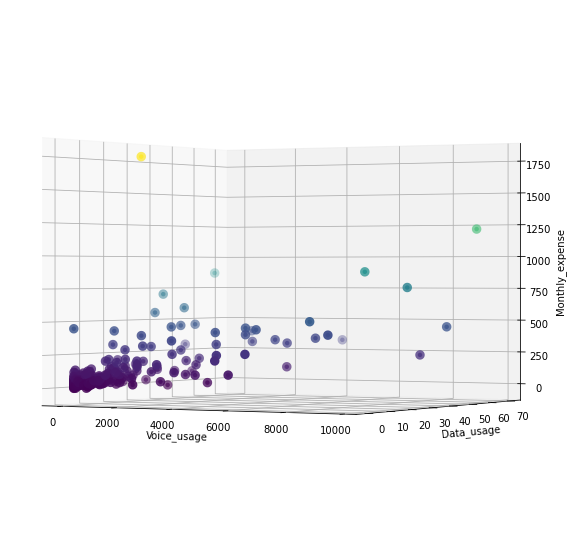

In [17]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(0, -60)
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
training_dt_filtered=training_dt[(training_dt['Voice_usage']<=10000) & (training_dt['Data_usage']<=100)]

# Data for a three-dimensional line
X=training_dt_filtered.loc[:,'Voice_usage'].values
Y=training_dt_filtered.loc[:,'Data_usage'].values
Z=training_dt_filtered.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')
ax.scatter3D(X, Y, Z, c=Z, cmap='viridis', linewidth=5);
plt.show()

# Step 3: Training the model and performance evaluation: Segmentation of customers through K-means clustering

Once the dataset has been processed and we have a first understanding of the type and characteristics of the variables, we are ready to apply clustering methods to group the register to answer the key marketing question: How are our customers?

Firstly, we will code our own Kmeans algorithm. As the dataset has a high number of features, we will select voice usage, data usage and monthly expense variables to fit the clusters.
Once the clustering is done, we need to understand the output. 2-dimension and 3-dimension scatter plot visualizations are excellent techniques to evaluate the clustering output.
To check if our Kmeans algorithm works properly, we will use the Sklearn’s Kmeans function to cluster the dataset. We will compare the 2D and 3D plots from the Sklearn clustering and ours.
Finally, as part of any Machine Learning Project, we need to calculate the perfomance of our model. For Kmeans, we will 1) estimate the optimal K value through the Elbow method and 2) calculate the sihouette score for several values of K


## Your own K-means function

[**EX11**] [**CODE**] Build a `calculate_distance` function to calculate the distance between each point and the centroid

In [18]:
#Solution
def calculate_distance(X, centroid):
    squareDistance = [0] * X.shape[0]

    for i in range(X.shape[0]):  #point
      for j in range(X.shape[1]):   #coord
        squareDistance[i] += (X[i][j]-centroid[j])**2     

    return squareDistance

[**EX12**] [**CODE**] Build `K_means_clustering` function that creates a clustering according to K-means methodology.

In [19]:
#Solution
def K_means_clustering(X, n_clusters = 3, seed = 1, num_iterations = 10):
    # Initialitize centroids based on a random selection of #n_clusters samples of X 
    rng = np.random.RandomState(seed)
    i = rng.permutation(X.shape[0])[:n_clusters] 
    x = np.asarray(X)
    centroids = x[i]

    distance = [0]*3
    labels = [0]*X.shape[0]  #store cluster of each point
 
    #Repeat the process during num_iterations or convergence achieved
    for num in range(num_iterations):
      distance[0] = calculate_distance(x, centroids[0])
      distance[1] = calculate_distance(x, centroids[1])
      distance[2] = calculate_distance(x, centroids[2])

      for i in range(X.shape[0]):  #point
        for j in range(X.shape[1]):  #cluster
            d_clusters = [distance[0][i], distance[1][i], distance[2][i]]
            labels[i] = np.argmin(d_clusters)
             
      #Calculate the new centroids based on the means of each point assigned to each cluster 
      
      #MEAN OF THE POINTS
      new_centroids = np.zeros((3,3))
      counts=[0]*3

      for i in range(X.shape[0]):  #for each point
        point = x[i]  #select point
        k = labels[i] #get the cluster
        new_centroids[k] += point
        counts[k] += 1
      
      new_centroids[0]=np.divide(new_centroids[0],counts[0])
      new_centroids[1]=np.divide(new_centroids[1],counts[1])
      new_centroids[2]=np.divide(new_centroids[2],counts[2])
      
      # Evaluate convergence: if new_centroids=centroids, stop iterations
      if np.all(centroids == new_centroids):
          print('Convergence achieved with:',num, 'iterations')
          break
      else:
        if num%10 == 0 and num != 0:
          print('No convergence yet after', num, 'iterations')


      centroids = new_centroids.copy()
        
    return centroids, labels

Let's define the `training_dt` dataset based on the following variables: `Voice_usage`, `Data_usage`, `Monthly_expense`.

In [20]:
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]


[**EX13**][**CODE**] Execute your `K_means_clustering` function to `training_dt` and number of clusters=3. Calculate the centroids of each cluster. How many iterations are necessary to achieve the clustering?

Convergence achieved with: 6 iterations
Centroids:
 [[3.00534817e+04 3.41363821e+02 2.07903423e+03]
 [2.60638689e+05 7.39684075e+02 9.09151318e+03]
 [1.17623173e+03 2.42640139e+01 1.53447525e+02]]


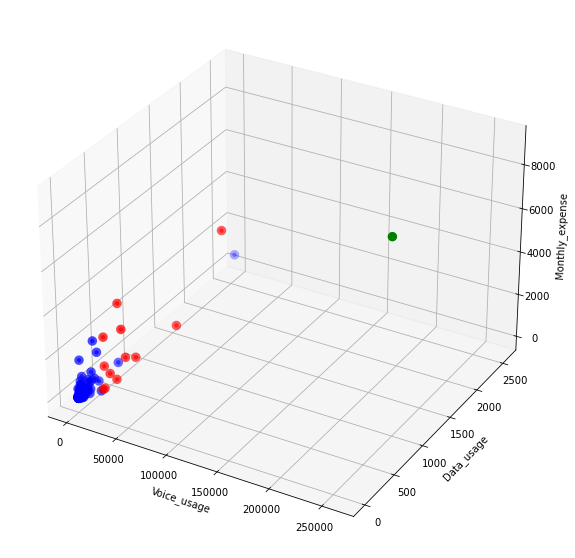

In [21]:
colors=np.array(["r","g","b"])
cent,lab = K_means_clustering(training_dt, 3, 1, 10)

print("Centroids:\n", cent)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
X=training_dt.loc[:,'Voice_usage'].values
Y=training_dt.loc[:,'Data_usage'].values
Z=training_dt.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')


ax.scatter3D(X, Y, Z,c=colors[lab], linewidth=5);
plt.show()


Now, it's time to understand how the clustering process works! To do it, we are plotting the `training_dt` painting the colour based on `Cluster_id`, output from the k-means. 

Convergence achieved with: 6 iterations


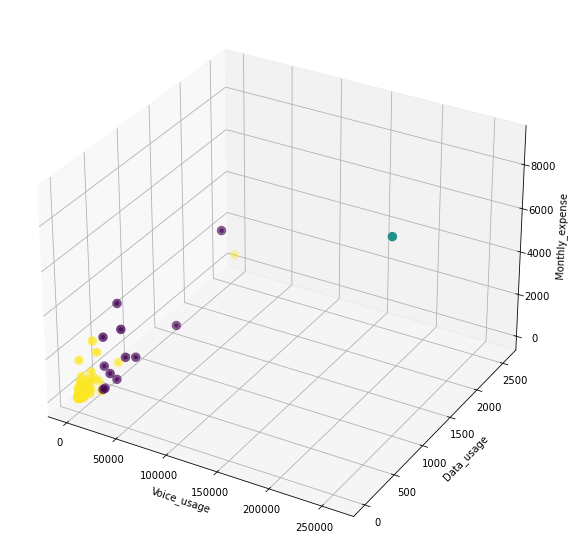

Size of each cluster
12
1
258


In [22]:
cent, lab=K_means_clustering(training_dt,3,1,10)
#cent stores the centroids whith the coordinates stored as following (Voice_usage,Data_Usage, Montly_expense)

colors=np.array(["r","g","b"])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X = training_dt.loc[:,'Voice_usage'].values
Y = training_dt.loc[:,'Data_usage'].values
Z = training_dt.loc[:,'Monthly_expense'].values


ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')


ax.scatter3D( X, Y, Z, c = lab, cmap='viridis', linewidth=5);
plt.show()

print("Size of each cluster")
print(lab.count(0))
print(lab.count(1))
print(lab.count(2))

 [**EX14**][**REPORT**] Plot the following scatter plots representing the centroids:
 - Between `Data_usage` vs `Voice_usage` 
 - Between `Monthly_expense`vs `Voice_usage` and
 - Between `Monthly_expense`vs `Data_usage`
 
 Describe the minority cluster in terms of `Data_usage`, `Voice_usage`and `Monthly_expense`. How many register is if formed by?

[[3.00534817e+04 3.41363821e+02 2.07903423e+03]
 [2.60638689e+05 7.39684075e+02 9.09151318e+03]
 [1.17623173e+03 2.42640139e+01 1.53447525e+02]]


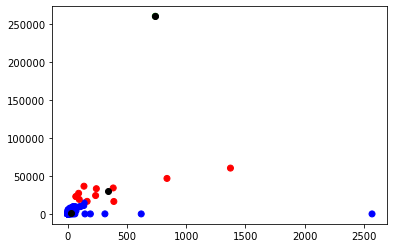

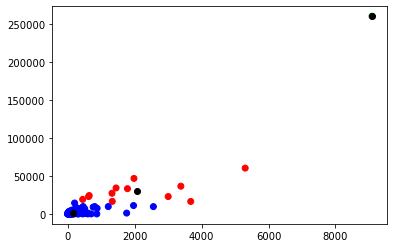

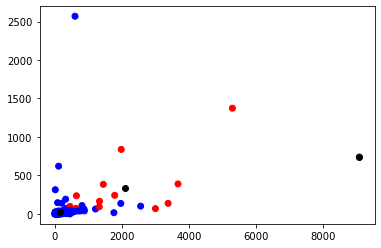

In [23]:
colors=np.array(["r","g","b"])

fig, ax = plt.subplots()
scat = ax.scatter(training_dt.loc[:,"Data_usage"], training_dt.loc[:,"Voice_usage"], c = colors[lab])
ax.scatter(cent[:,1], cent[:,0], color='black') #Centroids
fig.canvas.draw()

fig, ax = plt.subplots()
scat = ax.scatter(training_dt.loc[:,"Monthly_expense"], training_dt.loc[:,"Voice_usage"], c = colors[lab])
ax.scatter(cent[:,2], cent[:,0], color='black')
fig.canvas.draw()

fig, ax = plt.subplots()
scat = ax.scatter(training_dt.loc[:,"Monthly_expense"], training_dt.loc[:,"Data_usage"], c = colors[lab])
ax.scatter(cent[:,2], cent[:,1], color='black')
fig.canvas.draw()

print(cent)

[**EX15**] [**CODE**] [**REPORT**] Execute the Sklearn library's KMeans function and compare both `Data_usage`vs `Voice_usage`scatter plots. Are they similar?

Tip: We recommend the following  [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) parameters: `init`='random', `n_init`=10, `tol`=1e-04 and `random_state`=0

In [24]:
kmeans=KMeans(n_clusters=3,init='random', n_init=10, tol=1e-04, random_state=0).fit(training_dt)
print ("Achieved with:\n", kmeans.n_iter_, ' iterations')
print ("The labels are:\n", kmeans.labels_)  
print ("The centroids are:\n", kmeans.cluster_centers_)  

Achieved with:
 7  iterations
The labels are:
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
The centroids are:
 [[3.00534817e+04 3.41363821e+02 2.07903423e+03]
 [1.17623173e+03 2.42640139e+01 1.53447525e+02]
 [2.60638689e+05 7.39684075e+02 9.09151318e+03]]


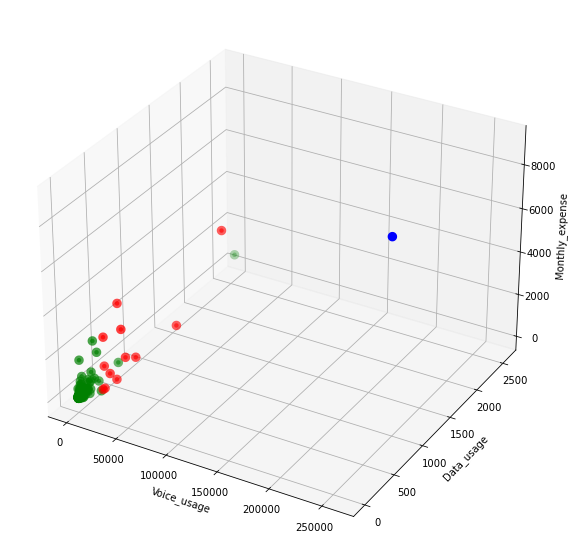

12
258
1


In [25]:
colors=np.array(["r","g","b"])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X=training_dt.loc[:,'Voice_usage'].values
Y=training_dt.loc[:,'Data_usage'].values
Z=training_dt.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')


ax.scatter3D(X, Y, Z, c=colors[kmeans.labels_], linewidth=5);
plt.show()

print(np.count_nonzero(kmeans.labels_ == 0))
print(np.count_nonzero(kmeans.labels_ == 1))
print(np.count_nonzero(kmeans.labels_ == 2))



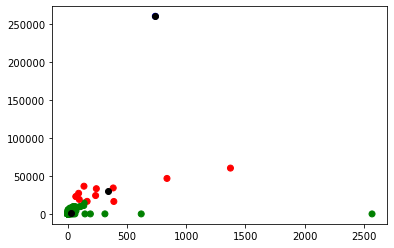

In [26]:
colors=np.array(["r","g","b"])

fig, ax = plt.subplots()
scat = ax.scatter(training_dt.loc[:,"Data_usage"], training_dt.loc[:,"Voice_usage"], c = colors[kmeans.labels_])
ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], color='black')
fig.canvas.draw()

[**EX16**] [**REPORT**] Repeat the 3D plot visualization between `Voice_usage`, `Data_usage`and `Monthly_expense` after the clustering process. Apply a rotation of (0, -60)

Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

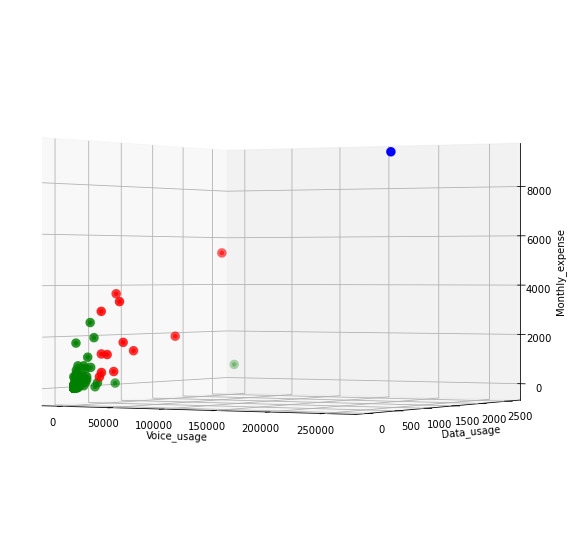

In [27]:
colors=np.array(["r","g","b"])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X=training_dt.loc[:,'Voice_usage'].values
Y=training_dt.loc[:,'Data_usage'].values
Z=training_dt.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')

ax.view_init(0, -60)

ax.scatter3D(X, Y, Z, c=colors[kmeans.labels_], cmap='viridis', linewidth=5);
plt.show()


## Measuring the quality of the clustering and the optimal K: Elbow method and sihouette

The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.

[**EX17**] [**REPORT**] Repeat the clustering (using Sklearn's or your own Kmeans function) with **K=5** and plot `Data_usage`vs `Voice_usage`scatter visualization. Can the new 5 clusters be visually distinguished? From a visual perspective, is this new cluster better than with **K=3**?

In [28]:
kmeans5=KMeans(n_clusters=5,init='random', n_init=10, tol=1e-04, random_state=0).fit(training_dt)
print ("Achieved with:\n", kmeans5.n_iter_, ' iterations')
print ("The labels are:\n", kmeans5.labels_)  
print ("The centroids are:\n", kmeans5.cluster_centers_)  

kmeans3=KMeans(n_clusters=3,init='random', n_init=10, tol=1e-04, random_state=0).fit(training_dt)
print ("Achieved with:\n", kmeans.n_iter_, ' iterations')
print ("The labels are:\n", kmeans.labels_)  
print ("The centroids are:\n", kmeans.cluster_centers_)  

Achieved with:
 18  iterations
The labels are:
 [1 1 3 1 1 3 3 1 1 1 1 1 0 1 1 1 1 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 3 1 1 1 1
 1 0 3 4 1 0 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 4 1 1 3 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 0 2 0 1 1 1 4 4 1 1 1 3 1 0 1 1 1 3 3 3 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 3 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
The centroids are:
 [[2.04659813e+04 1.57486401e+02 1.40752072e+03]
 [5.19031500e+02 2.23186326e+01 1.05920629e+02]
 [2.60638689e+05 7.39684075e+02 9.09151318e+03]
 [6.08004011e+03 3.60724851e+01 5.40227617e+02]
 [4.22564759e+04 5.95118758e+02 2.77910182e+03]]
Achieved with:
 7  iterations
The labels are:
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1

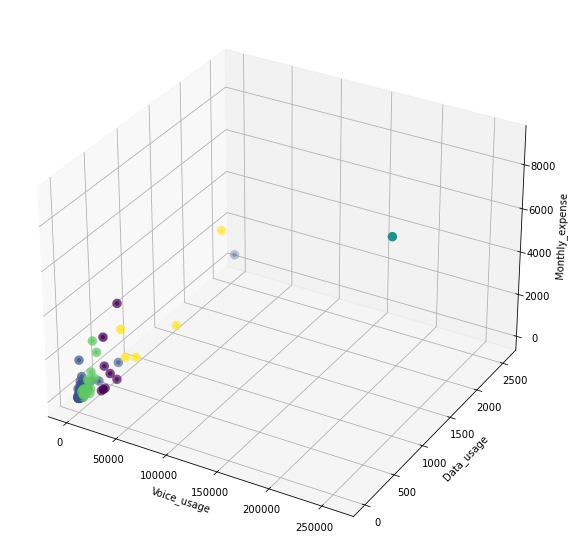

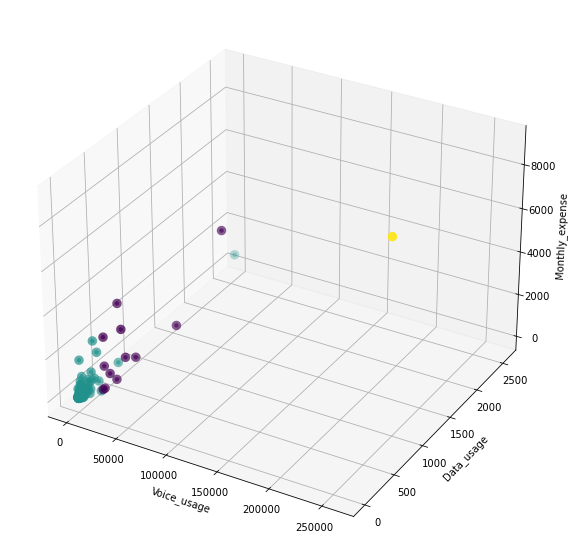

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X=training_dt.loc[:,'Voice_usage'].values
Y=training_dt.loc[:,'Data_usage'].values
Z=training_dt.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')

ax.scatter3D(X, Y, Z, c=kmeans5.labels_, cmap='viridis', linewidth=5);
plt.show()

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X=training_dt.loc[:,'Voice_usage'].values
Y=training_dt.loc[:,'Data_usage'].values
Z=training_dt.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')

ax.scatter3D(X, Y, Z, c=kmeans3.labels_, cmap='viridis', linewidth=5);
plt.show()

The elbow method is a useful graphical tool to estimate the optimal number of clusters. Intuitively, we can say that, if k increases, the distorsion within each cluster will decrease because the samples will be closer to their centroids. However, sometimes is not efficient to increase the **K** value because the distorsion doesn't decrease enough in comparision with the computation load required for higher **K**. 

Let's calculate the Elbow method for the previous dataset, i.e. containing only `Data_usage` and `Voice_usage` variables.
We use [km.inertia_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from the Sklearn library's KMeans to measure the sum of squared distances of samples to their closest cluster center.

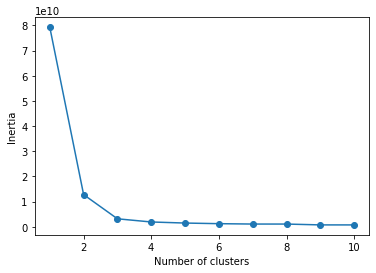

In [30]:
# Selection of the dataset
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
inertia = []
#Calculate the Kmeans from K=1 to 10
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    km.fit(training_dt)
    inertia.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

[**EX18**] [**REPORT**] Repeat the Elbow method for a training dataset formed by `Voice_usage`and `Data_usage`only. Which is the optimal **K** value?

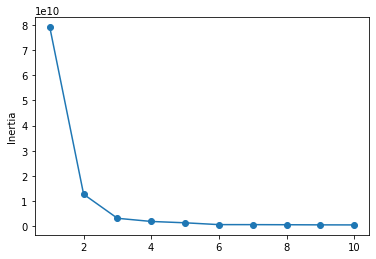

In [31]:
# Selection of the dataset
training_dt_2=customer_dt_summary[['Voice_usage', 'Data_usage']]
inertia = []
#Calculate the Kmeans from K=1 to 10
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10,
        tol=1e-04, random_state=0
    )
    km.fit(training_dt_2)
    inertia.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertia, marker='o')
#plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Silhouette** is a metric to measure the *quality* of the clustering process. Clustering models with a high **Silhouette** are said to be dense, i.e. samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other. This measure has a range of [-1, 1].

 [**EX19**] [**CODE**][**REPORT**]Calculate the `silhouette_score`value for a range of KMeans clusters from 2 to 7. The dataset to use is `training_dt`with the following variables: `Voice_usage`, `Data_usage` and `Monthly_expense`. Which is the value of **K** with better **Silhouette**?

Tip: use [silhouette_score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) to calculate the silhouette score and further information.

For a visual understanding about each cluster, we can plot the silhouette score for each sample of the dataset. Execute the following code:

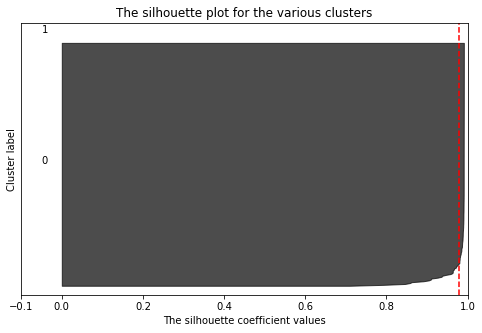

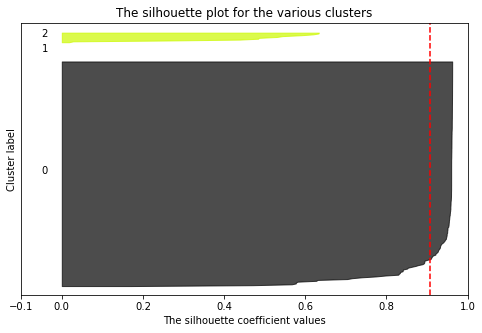

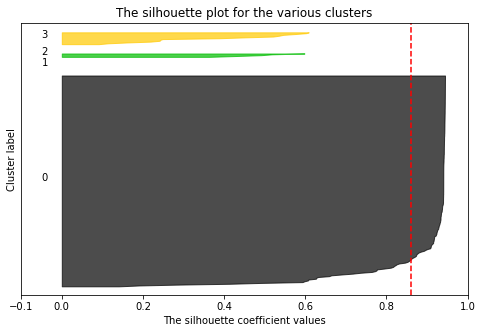

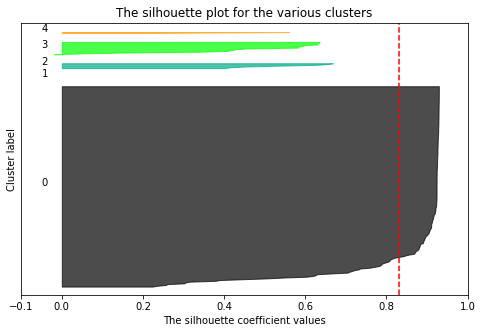

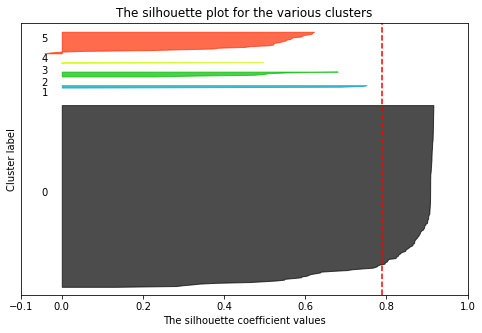

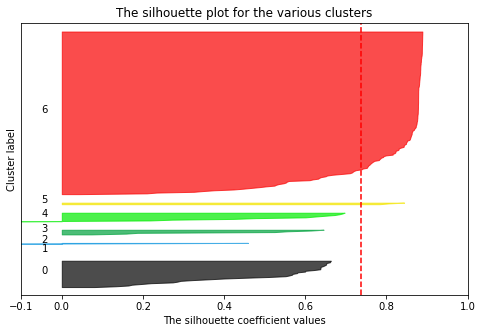

In [32]:
# Selection of the dataset
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
for j in range(2, 8):
    n_clusters=j
    km  = KMeans(j, random_state=10)
    cluster_labels = km.fit_predict(training_dt)
    silhouette_avg = silhouette_score(training_dt, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(training_dt, cluster_labels)
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# Step 4: Insights generation: Understanding the clustering output

Thanks to **Elbow method** and the **Silhouette** metric, we can confirm that K-Means with **K=3** is good enough to cluster our customer base and generate insights for our marketing department.

[**EX20**][**REPORT**]Repeat the K-Means clustering with **K=3** for the `training_dt`formed by `CNT_EMPLOYEE`, `Turnover`, `Voice_usage`, `Data_usage`, `Monthly_expense`. For each cluster, calculate the **mean**, **standard deviation**, **min**, **max** for each variable.
- Which is the cluster with the highest voice usage? 
- Which is the cluster with the highest data usage?
- Customers in the cluster with bigger companies (i.e. bigger number or employes and turnover) use to spend more than the others customers?
- As a part of the data scientist team, which is your recommended cluster of customers to sell a new mobile tariff with unlimited data traffic? And for a new mobile tariff with unlimited voice traffic? 

In [33]:
training_dt=customer_dt[['CNT_EMPLOYEE', 'Turnover', 'Voice_usage', 'Data_usage', 'Monthly_expense']]

km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=10,tol=1e-04, random_state=0)

clusters = km.fit_predict(training_dt)
dt_clusters = training_dt.groupby(clusters)

print("Means:", dt_clusters.mean())
print("\nStandard deviation:", dt_clusters.std())
print("\nMin:", dt_clusters.min())
print("\nMax:", dt_clusters.max())



Means:    CNT_EMPLOYEE      Turnover  Voice_usage  Data_usage  Monthly_expense
0   2555.169811  7.995761e+08   637.665094  172.569010       186.028269
1    291.093883  4.754306e+07  3792.223596   32.504633       284.608176
2   6311.000000  2.417794e+09   192.959722   29.231858       403.683541

Standard deviation:    CNT_EMPLOYEE      Turnover   Voice_usage  Data_usage  Monthly_expense
0   3048.295569  2.448489e+08   1481.290793  721.773899       211.156182
1    975.283172  7.387318e+07  18347.842066  130.158798       945.902744
2   3823.053943  5.955745e+08    236.402550   23.502548       349.008072

Min:    CNT_EMPLOYEE      Turnover  Voice_usage  Data_usage  Monthly_expense
0           1.0  4.800590e+08          0.0    0.000187        14.477000
1           1.0  1.718450e+05          0.0    0.000000         0.002533
2        3600.0  1.992770e+09          0.0    1.158308        22.707792

Max:    CNT_EMPLOYEE      Turnover    Voice_usage   Data_usage  Monthly_expense
0       11699.0  

# Let's repeat step 3 and 4 with Mixture of Gaussians clustering

As we know, there are other mechanisms to cluster a dataset. Let's test how Mixture of Gaussians function from sklearn library works.

In [34]:
print(training_dt)
print(customer_dt_summary)

                      CNT_EMPLOYEE     Turnover  Voice_usage  Data_usage  \
Reference_date_month                                                       
2019-09-01 00:00:00         1000.0  117560584.0   592.916666    0.197695   
2019-10-01 00:00:00         1000.0  117560584.0   414.500000    0.202878   
2019-11-01 00:00:00         1000.0  117560584.0   579.850000    0.025758   
2019-09-01 00:00:00           58.0   11000000.0  2633.950000    1.789936   
2019-09-01 00:00:00           58.0   11000000.0  3559.633332    2.480318   
...                            ...          ...          ...         ...   
2019-10-01 00:00:00           11.0   33000000.0   350.750000    5.811161   
2019-11-01 00:00:00           11.0   33000000.0   229.916667    2.431065   
2019-09-01 00:00:00            7.0     171845.0     0.000000    0.623612   
2019-10-01 00:00:00            7.0     171845.0     0.083333    2.083039   
2019-11-01 00:00:00            7.0     171845.0     0.016667    0.330773   

           

[**EX21**][**CODE**][**REPORT**] Execute the Mixture of Gaussians function (with number of components=3) to `training_dt` dataset with `Voice_usage`, `Data_usage`and `Monthly_expense` variables. 
- Which is the size of each cluster? 
- Visualize the scatter plot between `Data_usage` vs `Voice_usage`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `Data_usage` vs `Monthly_expense`. Is it similar to the resulting from K-Means and K=3?
- Visualize the scatter plot between `Voice_usage` vs `Monthly_expense`. Is it similar to the resulting from K-Means and K=3?

Tip: You may use [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) from Sklearn libray.

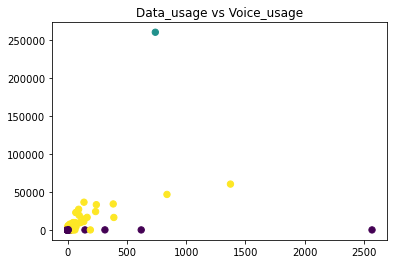

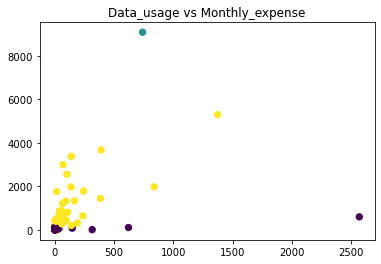

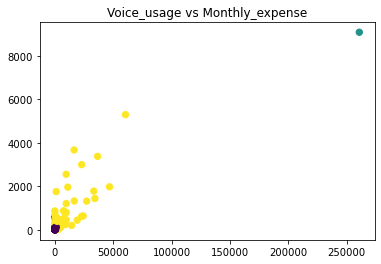

In [35]:
data=customer_dt_summary[['Data_usage', 'Voice_usage', 'Monthly_expense']]
mg = GaussianMixture(n_components=3, random_state=0).fit(data)
labels = mg.predict(data)

plt.title('Data_usage vs Voice_usage')
plt.scatter(data.loc[:,'Data_usage'], data.loc[:,'Voice_usage'], c=labels, s=40, cmap='viridis');
plt.show()
plt.title('Data_usage vs Monthly_expense')
plt.scatter(data.loc[:,'Data_usage'], data.loc[:,'Monthly_expense'], c=labels, s=40, cmap='viridis');
plt.show()
plt.title('Voice_usage vs Monthly_expense')
plt.scatter(data.loc[:,'Voice_usage'], data.loc[:,'Monthly_expense'], c=labels, s=40, cmap='viridis');
plt.show()

In [36]:
print(np.count_nonzero(labels == 0))
print(np.count_nonzero(labels == 1))
print(np.count_nonzero(labels == 2))

191
1
79


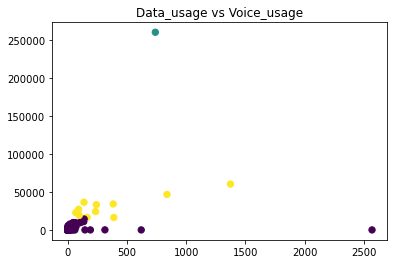

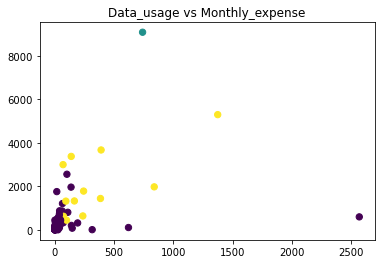

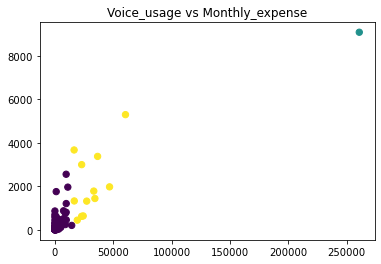

In [37]:
data=customer_dt_summary[['Data_usage', 'Voice_usage', 'Monthly_expense']]
km = KMeans(n_clusters=3, random_state=0).fit(data)
labels = km.predict(data)

plt.title('Data_usage vs Voice_usage')
plt.scatter(data.loc[:,'Data_usage'], data.loc[:,'Voice_usage'], c=labels, s=40, cmap='viridis');
plt.show()
plt.title('Data_usage vs Monthly_expense')
plt.scatter(data.loc[:,'Data_usage'], data.loc[:,'Monthly_expense'], c=labels, s=40, cmap='viridis');
plt.show()
plt.title('Voice_usage vs Monthly_expense')
plt.scatter(data.loc[:,'Voice_usage'], data.loc[:,'Monthly_expense'], c=labels, s=40, cmap='viridis');
plt.show()

[**EX22**][**REPORT**] Visualize the 3D plot  between `Voice_usage`, `Data_usage`and `Monthly_expense` after the clustering process. Apply a rotation of (0, -60)

Tip: use [scatter3d](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create 3D scatter plots.

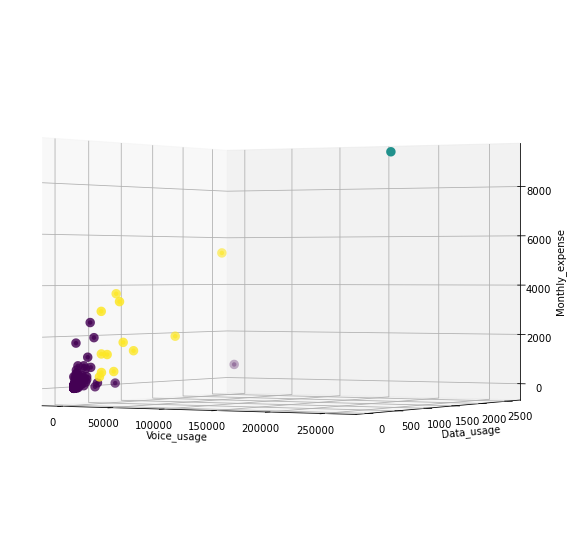

In [38]:
colors=np.array(["r","g","b"])
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
X=data.loc[:,'Voice_usage'].values
Y=data.loc[:,'Data_usage'].values
Z=data.loc[:,'Monthly_expense'].values

ax.set_xlabel('Voice_usage')
ax.set_ylabel('Data_usage')
ax.set_zlabel('Monthly_expense')
#ax.set_xlim(0,10000)
#ax.set_ylim(0,100)
ax.view_init(0, -60)


ax.scatter3D(X, Y, Z, c=labels, cmap='viridis', linewidth=5);
#plt.scatter(data.loc[:,'Voice_usage'], data.loc[:,'Monthly_expense'], c=labels, s=40, cmap='viridis');
plt.show()

[**EX23**][**REPORT**] Evaluate the **Silhouette** metric for MoG with **number of components** from 2 to 7. Which is the number of cluster with the highest score?

0.9796266708153692
0.5431628939892772
0.2543297961700405
0.27747002605559695
0.3161972480528674
0.3114732624377875


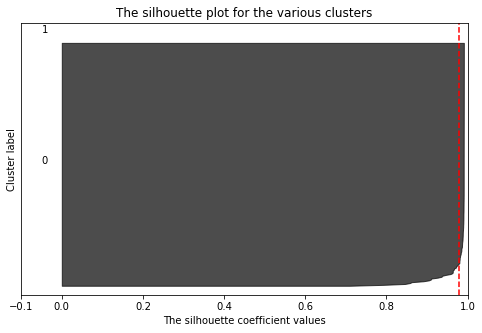

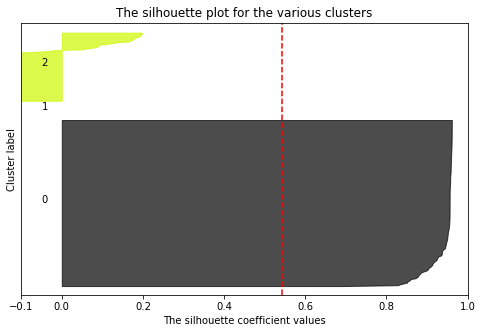

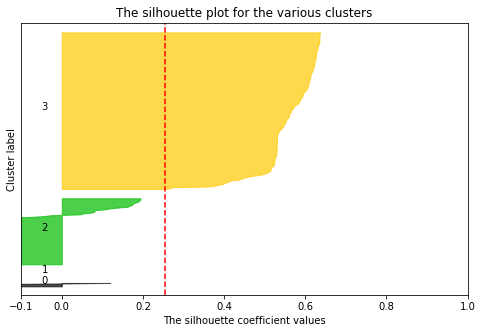

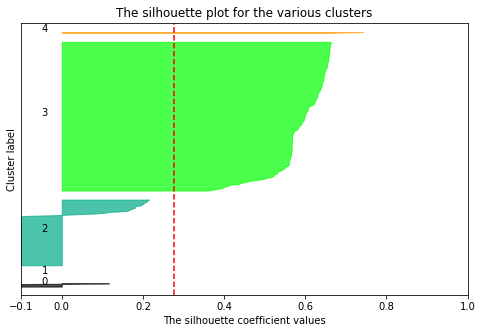

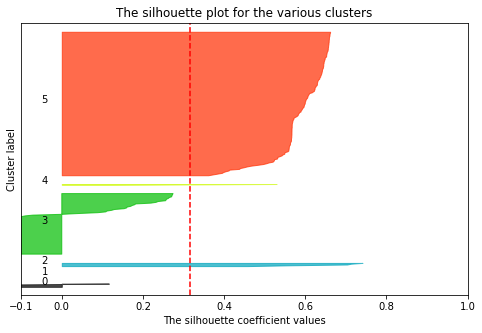

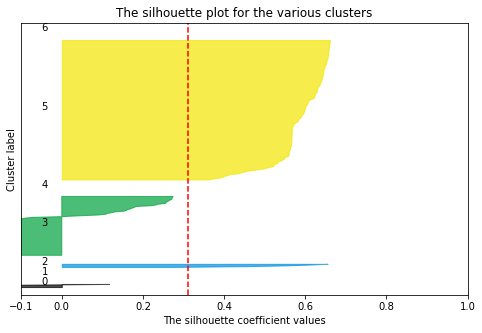

In [39]:
# Selection of the dataset
training_dt=customer_dt_summary[['Voice_usage', 'Data_usage', 'Monthly_expense']]
for j in range(2, 8):
    n_clusters=j
    gm  = GaussianMixture(j, random_state=10)
    cluster_labels = gm.fit_predict(training_dt)
    silhouette_avg = silhouette_score(training_dt, cluster_labels)
    print(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(training_dt, cluster_labels)
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(training_dt) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

[**EX24**][**REPORT**] For n_components=3 and a dataset formed by `CNT_EMPLOYEE`, `Turnover`, `Voice_usage`, `Data_usage` and `Monthly_expense` variables, calculate the MoG clustering. For each cluster, calculate the **mean**, **standard deviation**, **min**, **max** for each variable.
- Are these clusters similar to the resulting from KMeans=3?
- Which is the cluster with the highest voice usage? 
- Which is the cluster with the highest data usage?
- Customers in the cluster with bigger companies (i.e. bigger number or employes and turnover) use to spend more than the others customers?
- As a part of the data scientist team, which is your recommended cluster of customers to sell a new mobile tariff with unlimited data traffic? And for a new mobile tariff with unlimited voice traffic? 

In [40]:
customer_dt_summary=customer_dt[["Company_id","Sub_product","Data_usage","Voice_usage", "Monthly_expense", "N_lines","CNT_EMPLOYEE","Turnover"]]
customer_dt_summary=customer_dt_summary.groupby(["Company_id","Sub_product"]).mean()
training_dt=customer_dt_summary[['CNT_EMPLOYEE', 'Turnover', 'Voice_usage', 'Data_usage', 'Monthly_expense']]

gm = GaussianMixture(n_components=3, n_init=10, max_iter=10,tol=1e-04, random_state=0)

clusters = gm.fit_predict(training_dt)
dt_clusters = training_dt.groupby(clusters)

print("Means:", dt_clusters.mean())
print("\nStandard deviation:", dt_clusters.std())
print("\nMin:", dt_clusters.min())
print("\nMax:", dt_clusters.max())

Means:    CNT_EMPLOYEE      Turnover  Voice_usage  Data_usage  Monthly_expense
0    103.069149  2.037427e+07  4703.802680   35.799570       338.445754
1   6311.000000  2.417794e+09   192.959722   29.231858       403.683541
2   1253.898734  2.818792e+08   502.044463   53.783783       106.162652

Standard deviation:    CNT_EMPLOYEE      Turnover   Voice_usage  Data_usage  Monthly_expense
0    159.883214  3.665166e+07  20422.653530  136.428044       921.672846
1   4226.545161  6.584324e+08    236.638358   24.662919       385.842851
2   2247.103974  3.169376e+08    925.147000  297.849975       137.362469

Min:    CNT_EMPLOYEE      Turnover  Voice_usage  Data_usage  Monthly_expense
0           1.0  1.718450e+05          0.0     0.00000         2.698239
1        3600.0  1.992770e+09          0.0     1.23611        23.103346
2           1.0  2.700000e+05          0.0     0.00000         0.002533

Max:    CNT_EMPLOYEE      Turnover    Voice_usage   Data_usage  Monthly_expense
0        1419.0  

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
